In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\JupyterProjects\Projects\Food Marketing\u_food_marketing.csv")

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
pd.set_option('display.max.columns', 50)
pd.set_option('display.max.rows', 2400)

In [5]:
df.head(20)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,1,0,0,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,1,0,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,1,0,0,0,0,0,1,36,23,1


In [6]:
df.duplicated().count()

2205

In [7]:
df.duplicated().sum()
df.drop_duplicates(keep = False, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [9]:
#Sums horizontally. e.g a 0 from kidhome + 1 from teenhome = 1 for Total Children
df['Total_Children'] = df[['Kidhome', 'Teenhome']].sum(axis= 1 )

In [10]:
#Condensing marital status to 1-5 instead of 1,1,1,1,1 for each option
#Assigning each state to its own number instead of each column being between 0 and 1
df['marital_Divorced'] = df['marital_Divorced'].replace({1:5, 0:0})
df['marital_Married'] = df['marital_Married'].replace({1:4, 0:0})
df['marital_Single'] = df['marital_Single'].replace({1:3, 0:0})
df['marital_Together'] = df['marital_Together'].replace({1:2, 0:0})
df['marital_Widow'] = df['marital_Widow'].replace({1:1, 0:0})

In [11]:
#Combing all status columns into a single column with a numerical representation for each state
df['Marital_Status'] = df [['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)

In [12]:
#Converting the numerical representation into a string representation
df['Marital_Status_str'] = df['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [13]:
df[df['Marital_Status'] != 0].head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,2,0,0,0,0,1,0,702,688,0,1,2,Together
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,5,0,0,0,0,0,0,1,0,0,563,536,0,1,5,Divorced
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,4,0,0,0,0,0,0,0,1,146,123,0,1,4,Married
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,1,44,42,0,1,2,Together
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,1,36,23,1,2,2,Together


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [15]:
df['education_2n Cycle'] = df['education_2n Cycle'].replace({1:1, 0:0})
df['education_Basic'] = df['education_Basic'].replace({1:2, 0:0})
df['education_Graduation'] = df['education_Graduation'].replace({1:3, 0:0})
df['education_Master'] = df['education_Master'].replace({1:4, 0:0})
df['education_PhD'] = df['education_PhD'].replace({1:5, 0:0})

In [16]:
df['Education_Status'] = df[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis = 1)

In [17]:
df['Education_str'] = df['Education_Status'].map({5: 'PhD', 4: 'Master', 3: 'Bachelor', 2: 'Associates', 1: 'Highschool'})

In [18]:
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Bachelor
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Bachelor
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Bachelor
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Bachelor
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,2,0,0,0,0,4,0,702,688,0,1,2,Together,4,Master
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,5,0,0,0,0,0,0,3,0,0,563,536,0,1,5,Divorced,3,Bachelor
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,4,0,0,0,0,0,0,0,5,146,123,0,1,4,Married,5,PhD
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,PhD
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,PhD


In [19]:
df['Accepted_Campaigns'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis = 1)

In [20]:
df[df['Accepted_Campaigns'] != 0].head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Bachelor,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,PhD,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,PhD,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,Master,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,PhD,1
30,40548.0,0,1,31,110,0,5,2,0,3,2,2,1,4,5,0,1,0,0,0,0,3,11,0,50,2786,0,0,0,2,0,0,0,3,0,0,117,114,1,1,2,Together,3,Bachelor,1
31,46610.0,0,2,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1,68,2767,5,0,0,0,0,0,0,0,0,5,259,216,0,2,5,Divorced,5,PhD,1
43,7500.0,0,0,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1,24,2756,0,4,0,0,0,1,0,0,0,0,72,22,0,0,4,Married,1,Highschool,1
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,5,0,0,0,0,0,0,3,0,0,1376,1135,2,0,5,Divorced,3,Bachelor,3
51,82384.0,0,0,55,984,51,432,180,120,190,1,3,10,13,1,0,0,1,0,0,0,3,11,1,65,2746,0,0,0,2,0,0,0,0,4,0,1767,1577,1,0,2,Together,4,Master,2


In [21]:
#Was there a campaight accepted or not
df['Accepted_Campaigns'] = (df['Accepted_Campaigns'] != 0).astype(int)

In [22]:
df[df['Accepted_Campaigns'] != 0].head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Bachelor,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,PhD,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,PhD,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,Master,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,PhD,1
30,40548.0,0,1,31,110,0,5,2,0,3,2,2,1,4,5,0,1,0,0,0,0,3,11,0,50,2786,0,0,0,2,0,0,0,3,0,0,117,114,1,1,2,Together,3,Bachelor,1
31,46610.0,0,2,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1,68,2767,5,0,0,0,0,0,0,0,0,5,259,216,0,2,5,Divorced,5,PhD,1
43,7500.0,0,0,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1,24,2756,0,4,0,0,0,1,0,0,0,0,72,22,0,0,4,Married,1,Highschool,1
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,5,0,0,0,0,0,0,3,0,0,1376,1135,2,0,5,Divorced,3,Bachelor,1
51,82384.0,0,0,55,984,51,432,180,120,190,1,3,10,13,1,0,0,1,0,0,0,3,11,1,65,2746,0,0,0,2,0,0,0,0,4,0,1767,1577,1,0,2,Together,4,Master,1


In [23]:
#Dropping non numeric values to look at numerical correlations
df_Numeric_Only = df.drop(labels = ['Marital_Status_str', 'Education_str'], axis = 1)

In [24]:
#Correlative factors towards a campaign being accepted
df_Numeric_Only.corr(method = 'pearson')['Accepted_Campaigns'].sort_values(ascending= False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021551
marital_To

In [25]:
import seaborn as sns

<Axes: >

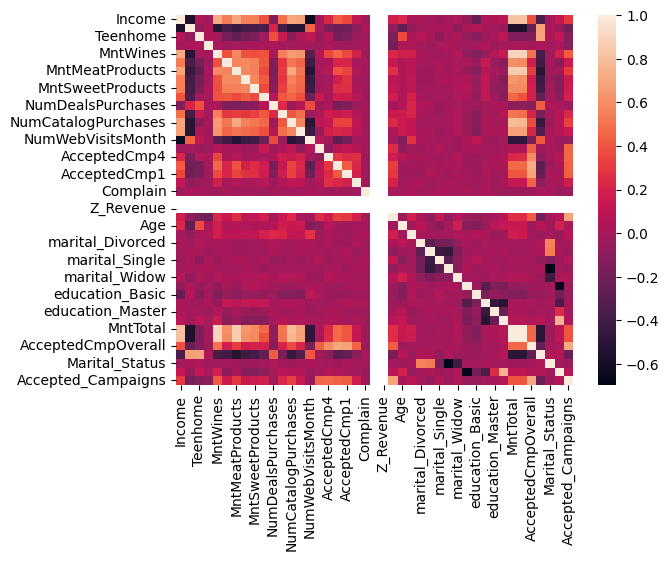

In [26]:
sns.heatmap(df_Numeric_Only.corr(method = 'pearson'))

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

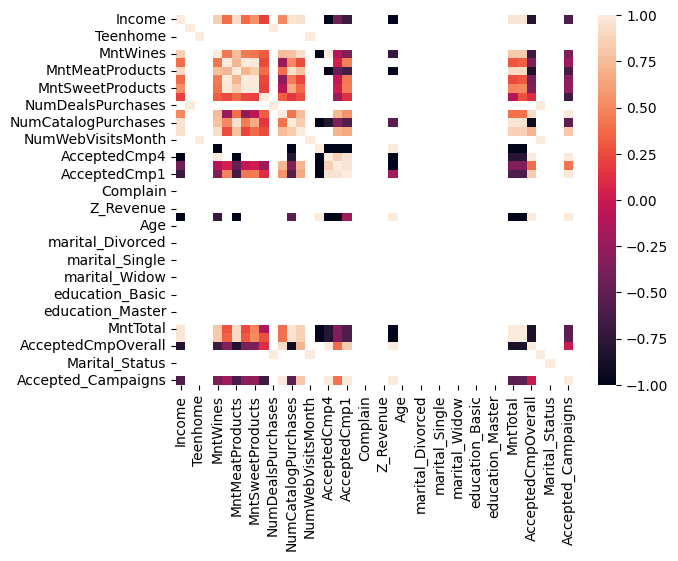

In [27]:
all_correlations = df_Numeric_Only.corr(method = 'pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]
sns.heatmap(all_correlations.corr(method = 'pearson'))
all_correlations['Accepted_Campaigns']

In [28]:
df.head(20)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Bachelor,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Bachelor,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Bachelor,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Bachelor,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,2,0,0,0,0,4,0,702,688,0,1,2,Together,4,Master,0
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,5,0,0,0,0,0,0,3,0,0,563,536,0,1,5,Divorced,3,Bachelor,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,4,0,0,0,0,0,0,0,5,146,123,0,1,4,Married,5,PhD,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,PhD,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,PhD,1


In [29]:
age_groups = [(23, 30) , (31,40), (41,50), (51,60), (61,70), (71,85)]

# For an age of 25, the assign_age_group function would check if 25 falls within any of the defined age ranges. 
# If it matches the range (23, 30), the line return f"{age_range[0]} - {age_range[1]}" would return "23 - 30", 
# which is the appropriate age group for this age.
def assign_age_group(Age):
    for age_range in age_groups:
        # if first element of tuple e.g (23) is less than/equal to  "Age" and is greater than/equal to 2nd tuple element e.g (31)
        #insert into assigned age groups
        if age_range[0] <= Age <= age_range[1]:
            #Formats age_range (23,30) to "23-30"
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

# Pass through the Age column and apply the function to create a new age group column
df['Age_Group'] = df['Age'].apply(assign_age_group)

In [30]:
df[['Age', 'Age_Group']].head(20)

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40
5,53,51 - 60
6,49,41 - 50
7,35,31 - 40
8,46,41 - 50
9,70,61 - 70


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

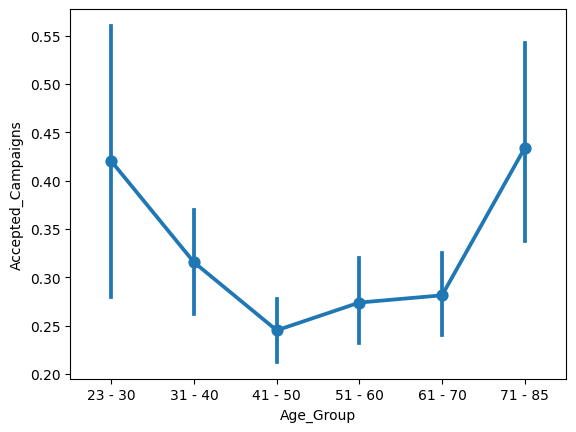

In [31]:
#Low confidence intervals for 23-30 and 71-85 may hint at a discrpancy in value counts

age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']
sns.pointplot(data = df, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

In [32]:
counts = df['Age_Group'].value_counts()
percentage = counts / df.shape[0]
percentage

Age_Group
41 - 50    0.332067
51 - 60    0.221921
61 - 70    0.212154
31 - 40    0.161693
71 - 85    0.045035
23 - 30    0.027130
Name: count, dtype: float64

In [33]:
percent_df = percentage.reset_index()

In [34]:
percent_df.columns = ['age_group', 'percentage']

In [35]:
percent_df = percent_df.sort_values('age_group')
percent_df

,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


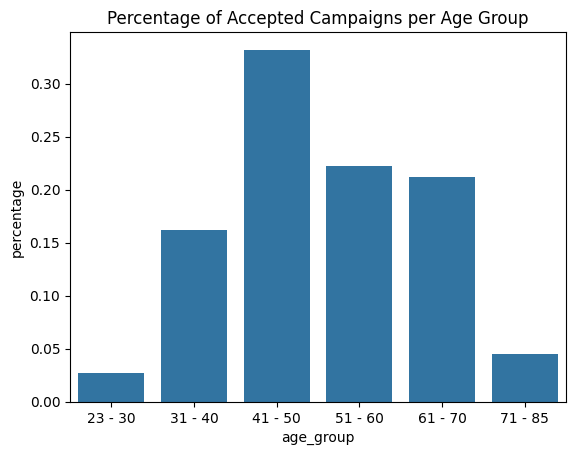

In [36]:
import matplotlib.pyplot as plt
sns.barplot(x = 'age_group', y = 'percentage', data = percent_df)
plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()

In [37]:
# Age Segmentation - core audience for accepting campaigns right now is 31 - 70
# However, we still should check to see how much these age groups are spending

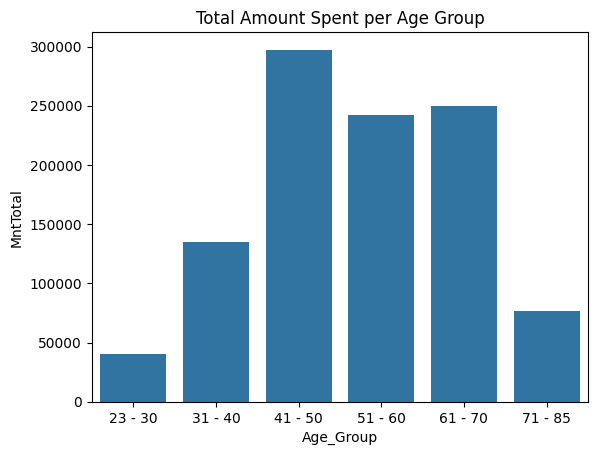

In [38]:
grouped_df = df.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_df)
plt.title("Total Amount Spent per Age Group")
plt.show()

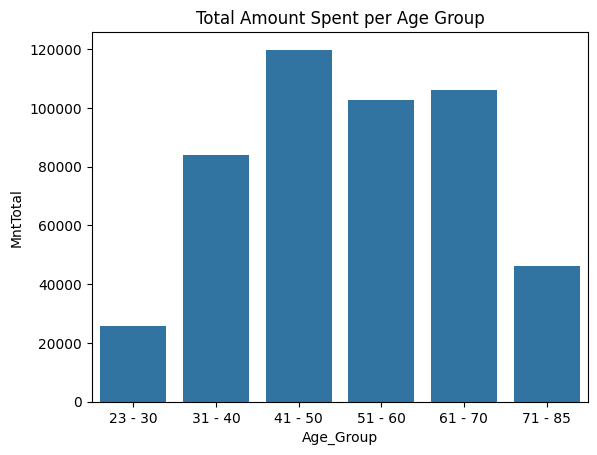

In [39]:
acct_camp = df[df['Accepted_Campaigns'] != 0]

grouped_df = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_df)
plt.title("Total Amount Spent per Age Group")
plt.show()

In [40]:
#Age Segmentation - core remains 31-70. 23-30, 71 and up accept at higher rates.

In [41]:
sum_df = pd.DataFrame(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns  = ['Sum'])

sum_df.reset_index(inplace = True)

sum_df.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)

sum_df

,Type_of_Purchase,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

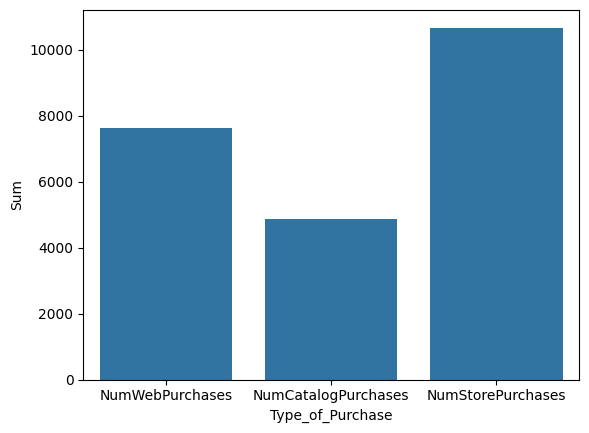

In [42]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_df)

<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

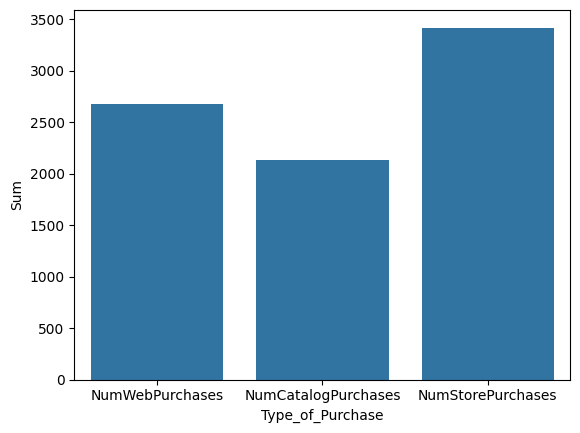

In [43]:
acct_camp = df[df['Accepted_Campaigns'] != 0]

sum_df = pd.DataFrame(acct_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns  = ['Sum'])
sum_df.reset_index(inplace = True)
sum_df.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)

sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_df)

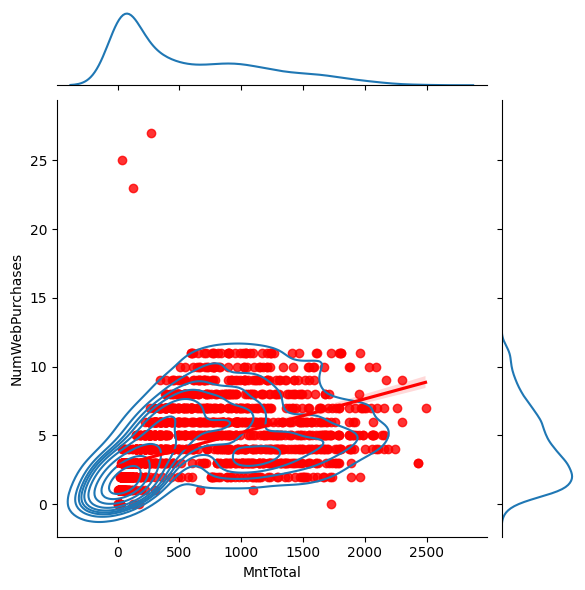

In [44]:
#Joinplots show distribution along with correlation
x = sns.jointplot(data = df, x = 'MntTotal', y ='NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

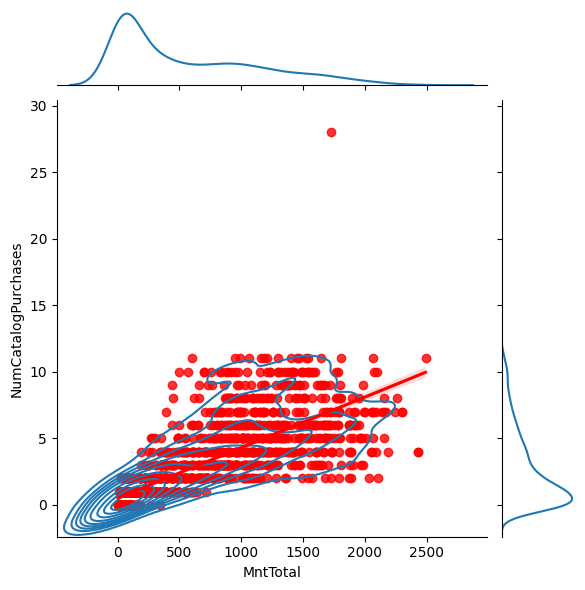

In [45]:
x = sns.jointplot(data = df, x = 'MntTotal', y ='NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

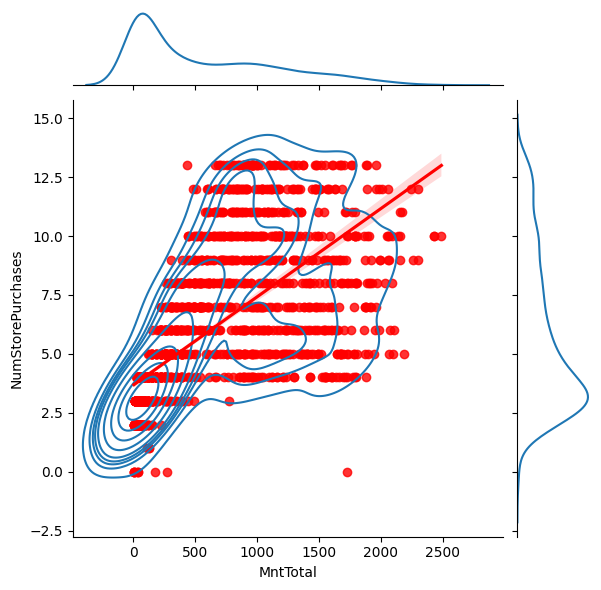

In [46]:
x = sns.jointplot(data = df, x = 'MntTotal', y ='NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'r')

In [47]:
# 2 directions: Boost higher percentage catalog customers.
# OR Focus on In Store/Web becuase they have more traffic

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

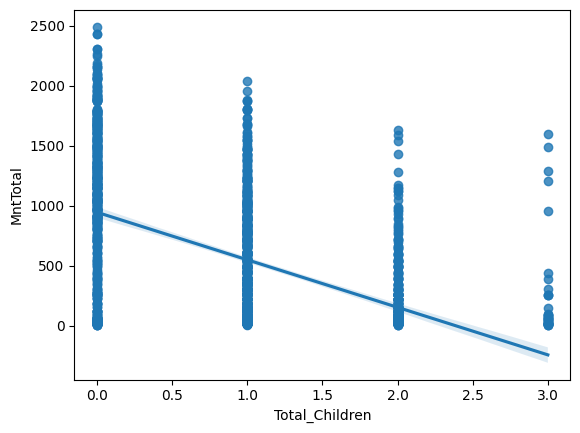

In [48]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = df)

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

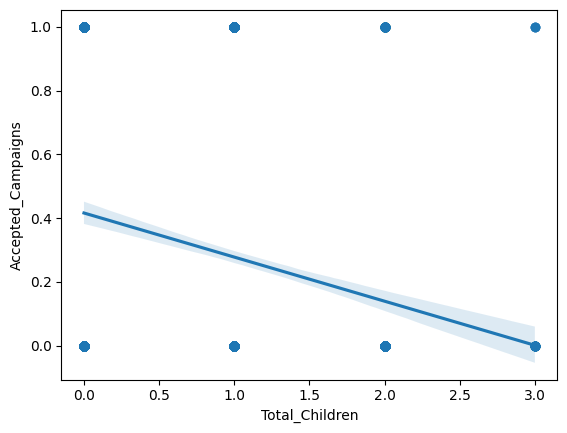

In [49]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = df)

In [50]:
# Less kids = More likely to accept campaigns and spend more money

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

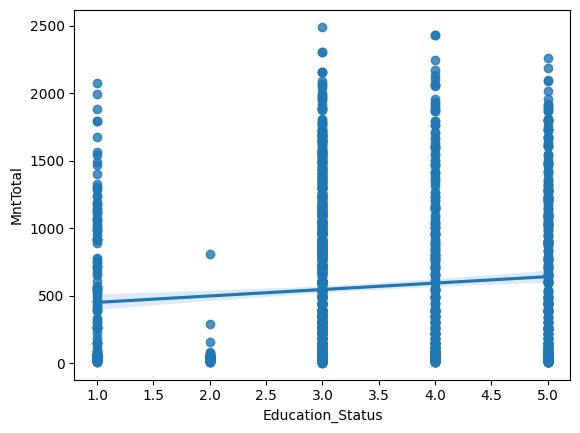

In [51]:
sns.regplot(x = 'Education_Status', y = 'MntTotal', data = df)

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

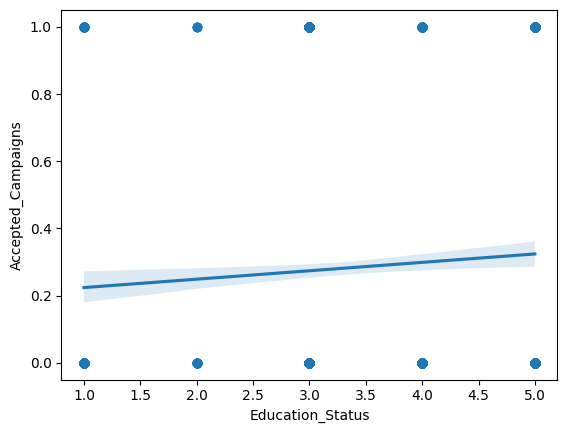

In [52]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = df)

In [53]:
# Education doesn't seem very significant for our segmentation

<Axes: xlabel='Marital_Status_str', ylabel='count'>

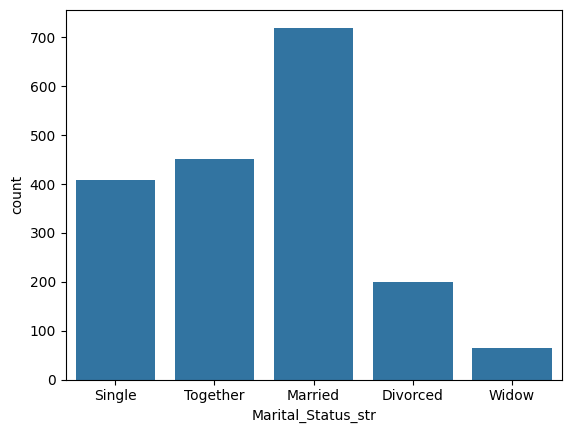

In [54]:
#How many peoeple are in each group
sns.countplot(x = 'Marital_Status_str', data = df)

<Axes: xlabel='Marital_Status', ylabel='MntTotal'>

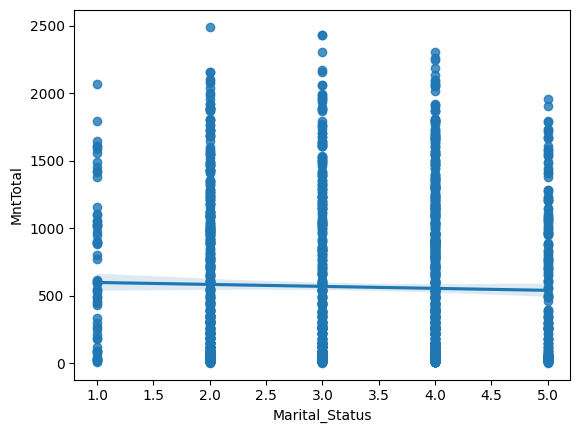

In [55]:
sns.regplot(x = 'Marital_Status', y = 'MntTotal', data = df)

<Axes: xlabel='Marital_Status', ylabel='Accepted_Campaigns'>

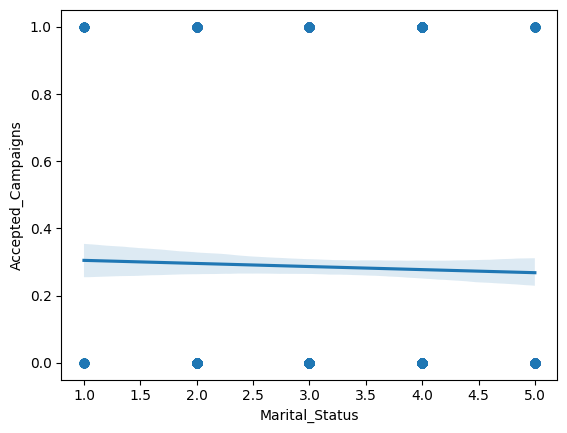

In [56]:
sns.regplot(x = 'Marital_Status', y = 'Accepted_Campaigns', data = df)

In [57]:
relationship_df = df.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

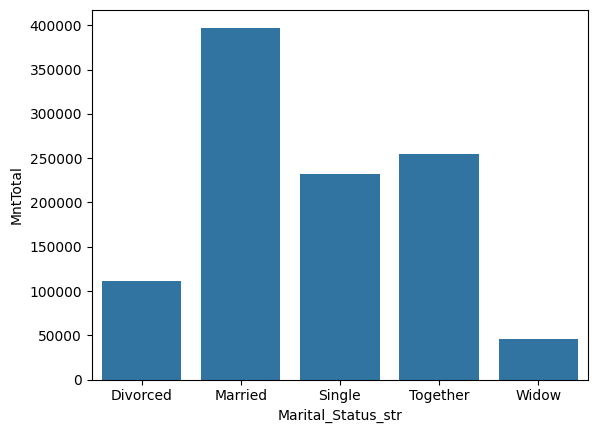

In [58]:
sns.barplot(data = relationship_df, x = 'Marital_Status_str', y = 'MntTotal')

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

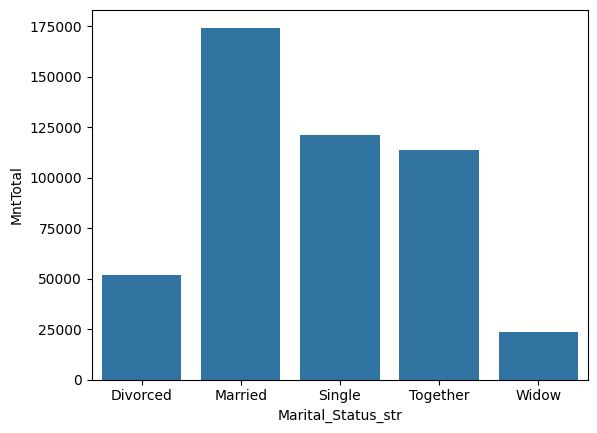

In [60]:
acct = df[df['Accepted_Campaigns'] != 0]

relationship_df = acct.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
sns.barplot(data = relationship_df, x = 'Marital_Status_str', y = 'MntTotal')

In [64]:
total = df['Marital_Status_str'].value_counts()
accepted = df[df['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()

pect_marital = accepted / total * 100

In [66]:
pect_df = pect_marital.reset_index()
pect_df.columns = ['Marital_Status', 'Percentage']

<Axes: xlabel='Marital_Status', ylabel='Percentage'>

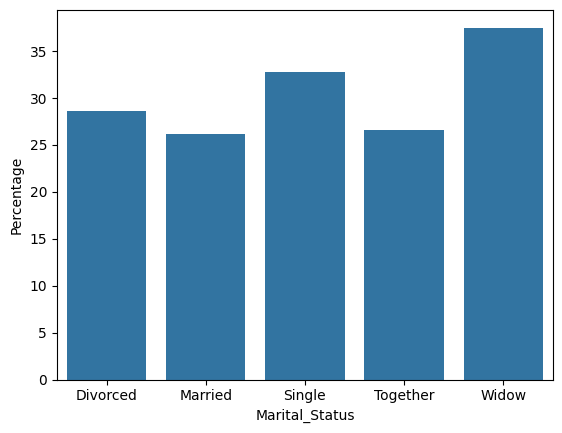

In [67]:
sns.barplot(data = pect_df, x = 'Marital_Status', y = 'Percentage')

In [61]:
# Marriage - Married, Single, Together are spending a lot more money than widow and divorced. We should focus on this segment

# Overall Findings

### 1. Age: 30-70 Were spending more money, but less likely to accept campaings. Does have a higher volume though.
### 2. Catalog was more likely to accept campaings, but in person spend more. Recommend a split between all.
- Maybe 40% Catalog, 30% Store, 30% web
### 3. Focus on people with less or no kids.
### 4. Education - no impact - not worth targeting any group
### 5. Marital Status: low impact. Married, Single, Together do spend more money


# Money Makers
1. Middle Aged Peopled, high earners, with no kids. Target on different platforms with split above.

# New Users to Spend Money
2. Focus on 21-30, 70 and up - who statistically accepted campaigns at a higher rate.